# Heart Disease Prediction

## Submission 1 - Machine Learning Terapan
Nama    : Andre Saputra Ginting

dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Latar Belakang
Penyakit jantung merupakan penyebab utama kematian di dunia dan sering tidak terdeteksi hingga gejala serius muncul atau terjadi serangan jantung mendadak tanpa peringatan. Kondisi ini disebut sebagai "penyakit tersembunyi" karena gejala awal seperti kelelahan, nyeri dada ringan, atau sesak napas sering disalahartikan sebagai masalah ringan, sehingga banyak penderita tidak memperoleh diagnosis dan pengobatan tepat waktu. Kurangnya kesadaran ini meningkatkan risiko komplikasi serius yang sebenarnya dapat dicegah dengan deteksi dini dan penanganan yang tepat (Columbia Asia, 2024).

Penyakit jantung dikenal sebagai salah satu penyebab utama kematian di dunia, termasuk di Indonesia. Berdasarkan data dari World Health Organization (WHO) tahun 2021, tercatat sekitar 17,8 juta kematian setiap tahunnya disebabkan oleh penyakit jantung, atau setara dengan satu dari tiga kematian secara global. Jumlah kasus penyakit jantung terbaru mencapai 21,2 juta, dengan prevalensi lebih tinggi pada laki-laki dibandingkan perempuan (Kementerian Kesehatan RI, 2021).

Penggunaan teknologi seperti machine learning dan analisis data kesehatan berperan penting dalam deteksi dini penyakit jantung. Dengan menganalisis data klinis dan gaya hidup, algoritma dapat mengenali pola dan faktor risiko secara akurat. Model prediktif ini membantu tenaga medis membuat keputusan lebih cepat dan tepat, serta memungkinkan pemantauan kesehatan secara berkala untuk mencegah kondisi memburuk. Pendekatan ini mendukung sistem kesehatan yang lebih preventif dan berpotensi menurunkan angka kematian akibat penyakit jantung.

#Import Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

!pip install opendatasets
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andresaputraginting
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 13.7MB/s]

# Load Dataset

In [ ]:
df = pd.read_csv('/content/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Understanding

In [ ]:
# List untuk menyimpan ringkasan per kolom
list_of_descs = []

for col in df.columns:
    col_type = df[col].dtype
    total_row = df.shape[0]
    null_count = df[col].isna().sum()
    null_pct = round((null_count / total_row) * 100, 2)
    unique_count = df[col].nunique()
    sample_unique = df[col].unique()

    list_of_descs.append([
        col,
        col_type,
        total_row,
        null_count,
        null_pct,
        unique_count,
        sample_unique
    ])

# Buat dataframe ringkasan
df_desc = pd.DataFrame(
    list_of_descs,
    columns=[
        'Column',
        'Type',
        'Total Rows',
        'Null Count',
        'Null %',
        'Unique Values',
        'Sample Unique Values'
    ]
)

# Tampilkan ringkasan
df_desc

,Column,Type,Total Rows,Null Count,Null %,Unique Values,Sample Unique Values
0,Age,int64,918,0,0.0,50,"[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6..."
1,Sex,object,918,0,0.0,2,"[M, F]"
2,ChestPainType,object,918,0,0.0,4,"[ATA, NAP, ASY, TA]"
3,RestingBP,int64,918,0,0.0,67,"[140, 160, 130, 138, 150, 120, 110, 136, 115, ..."
4,Cholesterol,int64,918,0,0.0,222,"[289, 180, 283, 214, 195, 339, 237, 208, 207, ..."
5,FastingBS,int64,918,0,0.0,2,"[0, 1]"
6,RestingECG,object,918,0,0.0,3,"[Normal, ST, LVH]"
7,MaxHR,int64,918,0,0.0,119,"[172, 156, 98, 108, 122, 170, 142, 130, 120, 9..."
8,ExerciseAngina,object,918,0,0.0,2,"[N, Y]"
9,Oldpeak,float64,918,0,0.0,53,"[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ..."


Dari hasil analisis awal deskripsi data, terlihat bahwa data siap untuk tahap selanjutnya.

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include=np.number).columns.drop('HeartDisease')

print(f'Categorical Column: {cat_columns}')
print(f'Numerical Column: {num_columns}')

Categorical Column: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Numerical Column: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


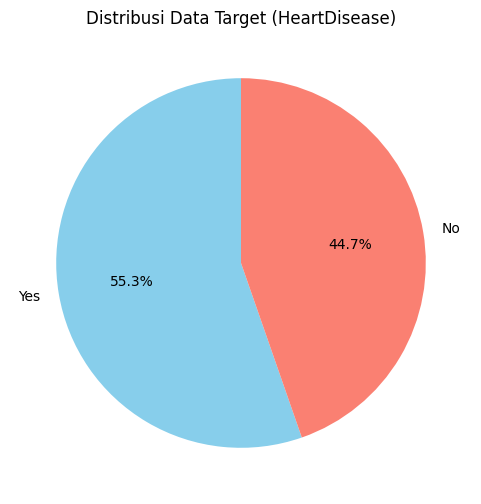

In [ ]:
# Visualisasi Distribusi Target
plt.figure(figsize=(6, 6))

# Buat Series dengan label yang diubah
target_counts = df['HeartDisease'].map({0: 'No', 1: 'Yes'}).value_counts()

target_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribusi Data Target (HeartDisease)')
plt.ylabel('')
plt.show()

Distribusi data pada label `HeartDisease` adalah cukup imbalance (55.3% vs 44.7%). Hal ini harus diperhatikan saat pelatihan model, agar tidak menghasilkan prediksi yang berat sebelah. Metrik evaluasi yang tepat dan teknik penyeimbangan data seperti oversampling bisa membantu mengatasi masalah ini.

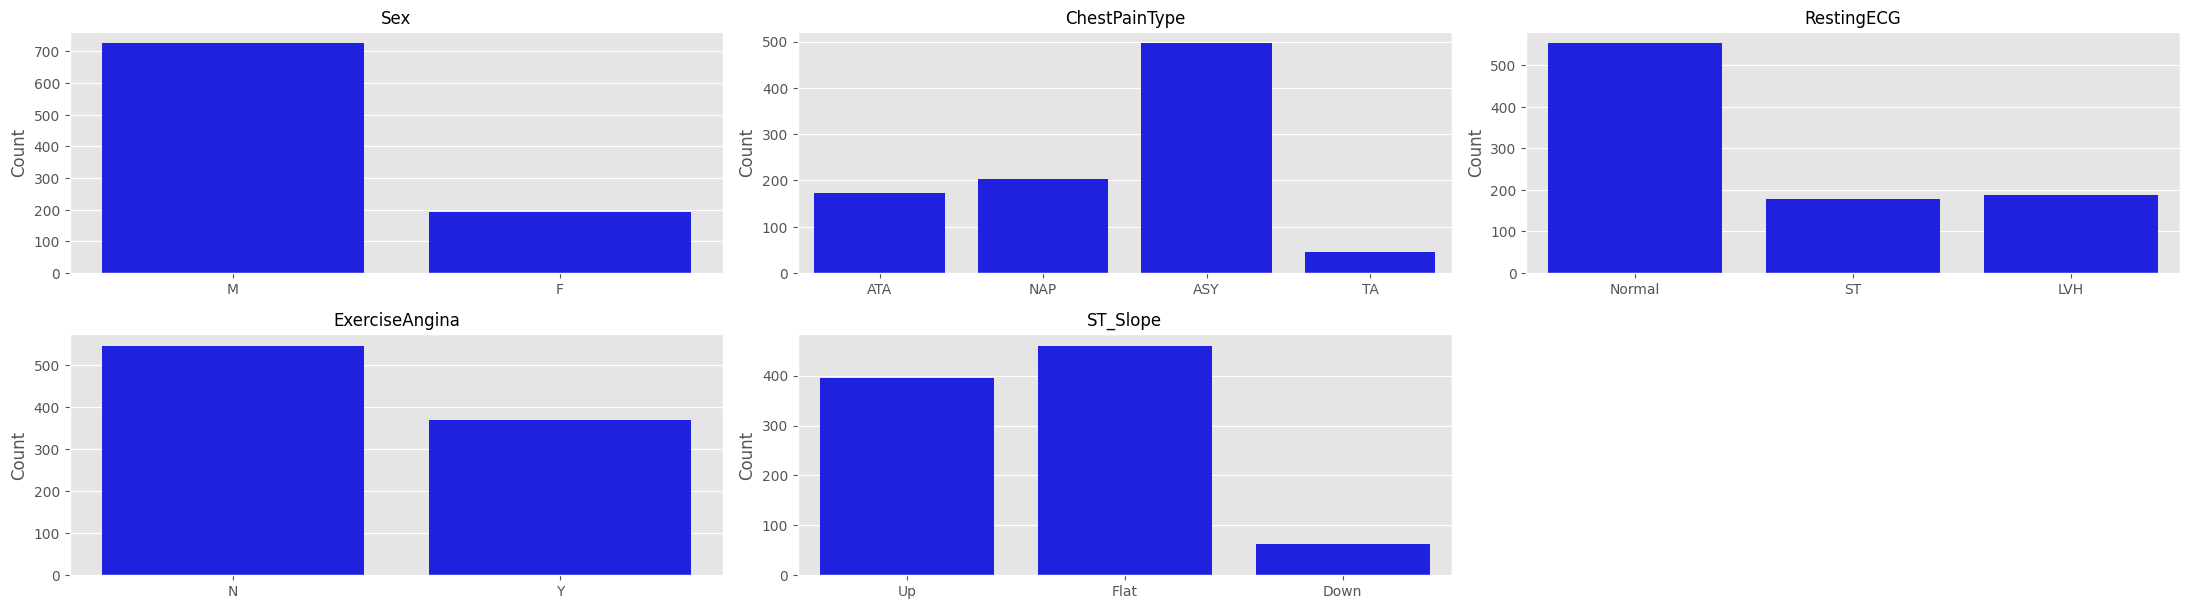

In [ ]:
plt.figure(figsize=(22,12))
plt.style.use('ggplot')

# Loop untuk membuat subplot
for i, col in enumerate(cat_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=df, x=col, color='blue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Distribusi data kategorikal menunjukkan ketimpangan pada beberapa fitur, seperti *ChestPainType* dan *ST\_Slope*. Ketimpangan ini dapat memengaruhi kinerja model, sehingga perlu penanganan khusus. Salah satu cara efektif adalah menggunakan **One-Hot Encoding**, yang mengubah setiap kategori menjadi kolom biner tanpa memberi makna urutan. Pendekatan ini membantu model memahami setiap kategori secara adil dan mencegah bias terhadap kategori mayoritas.


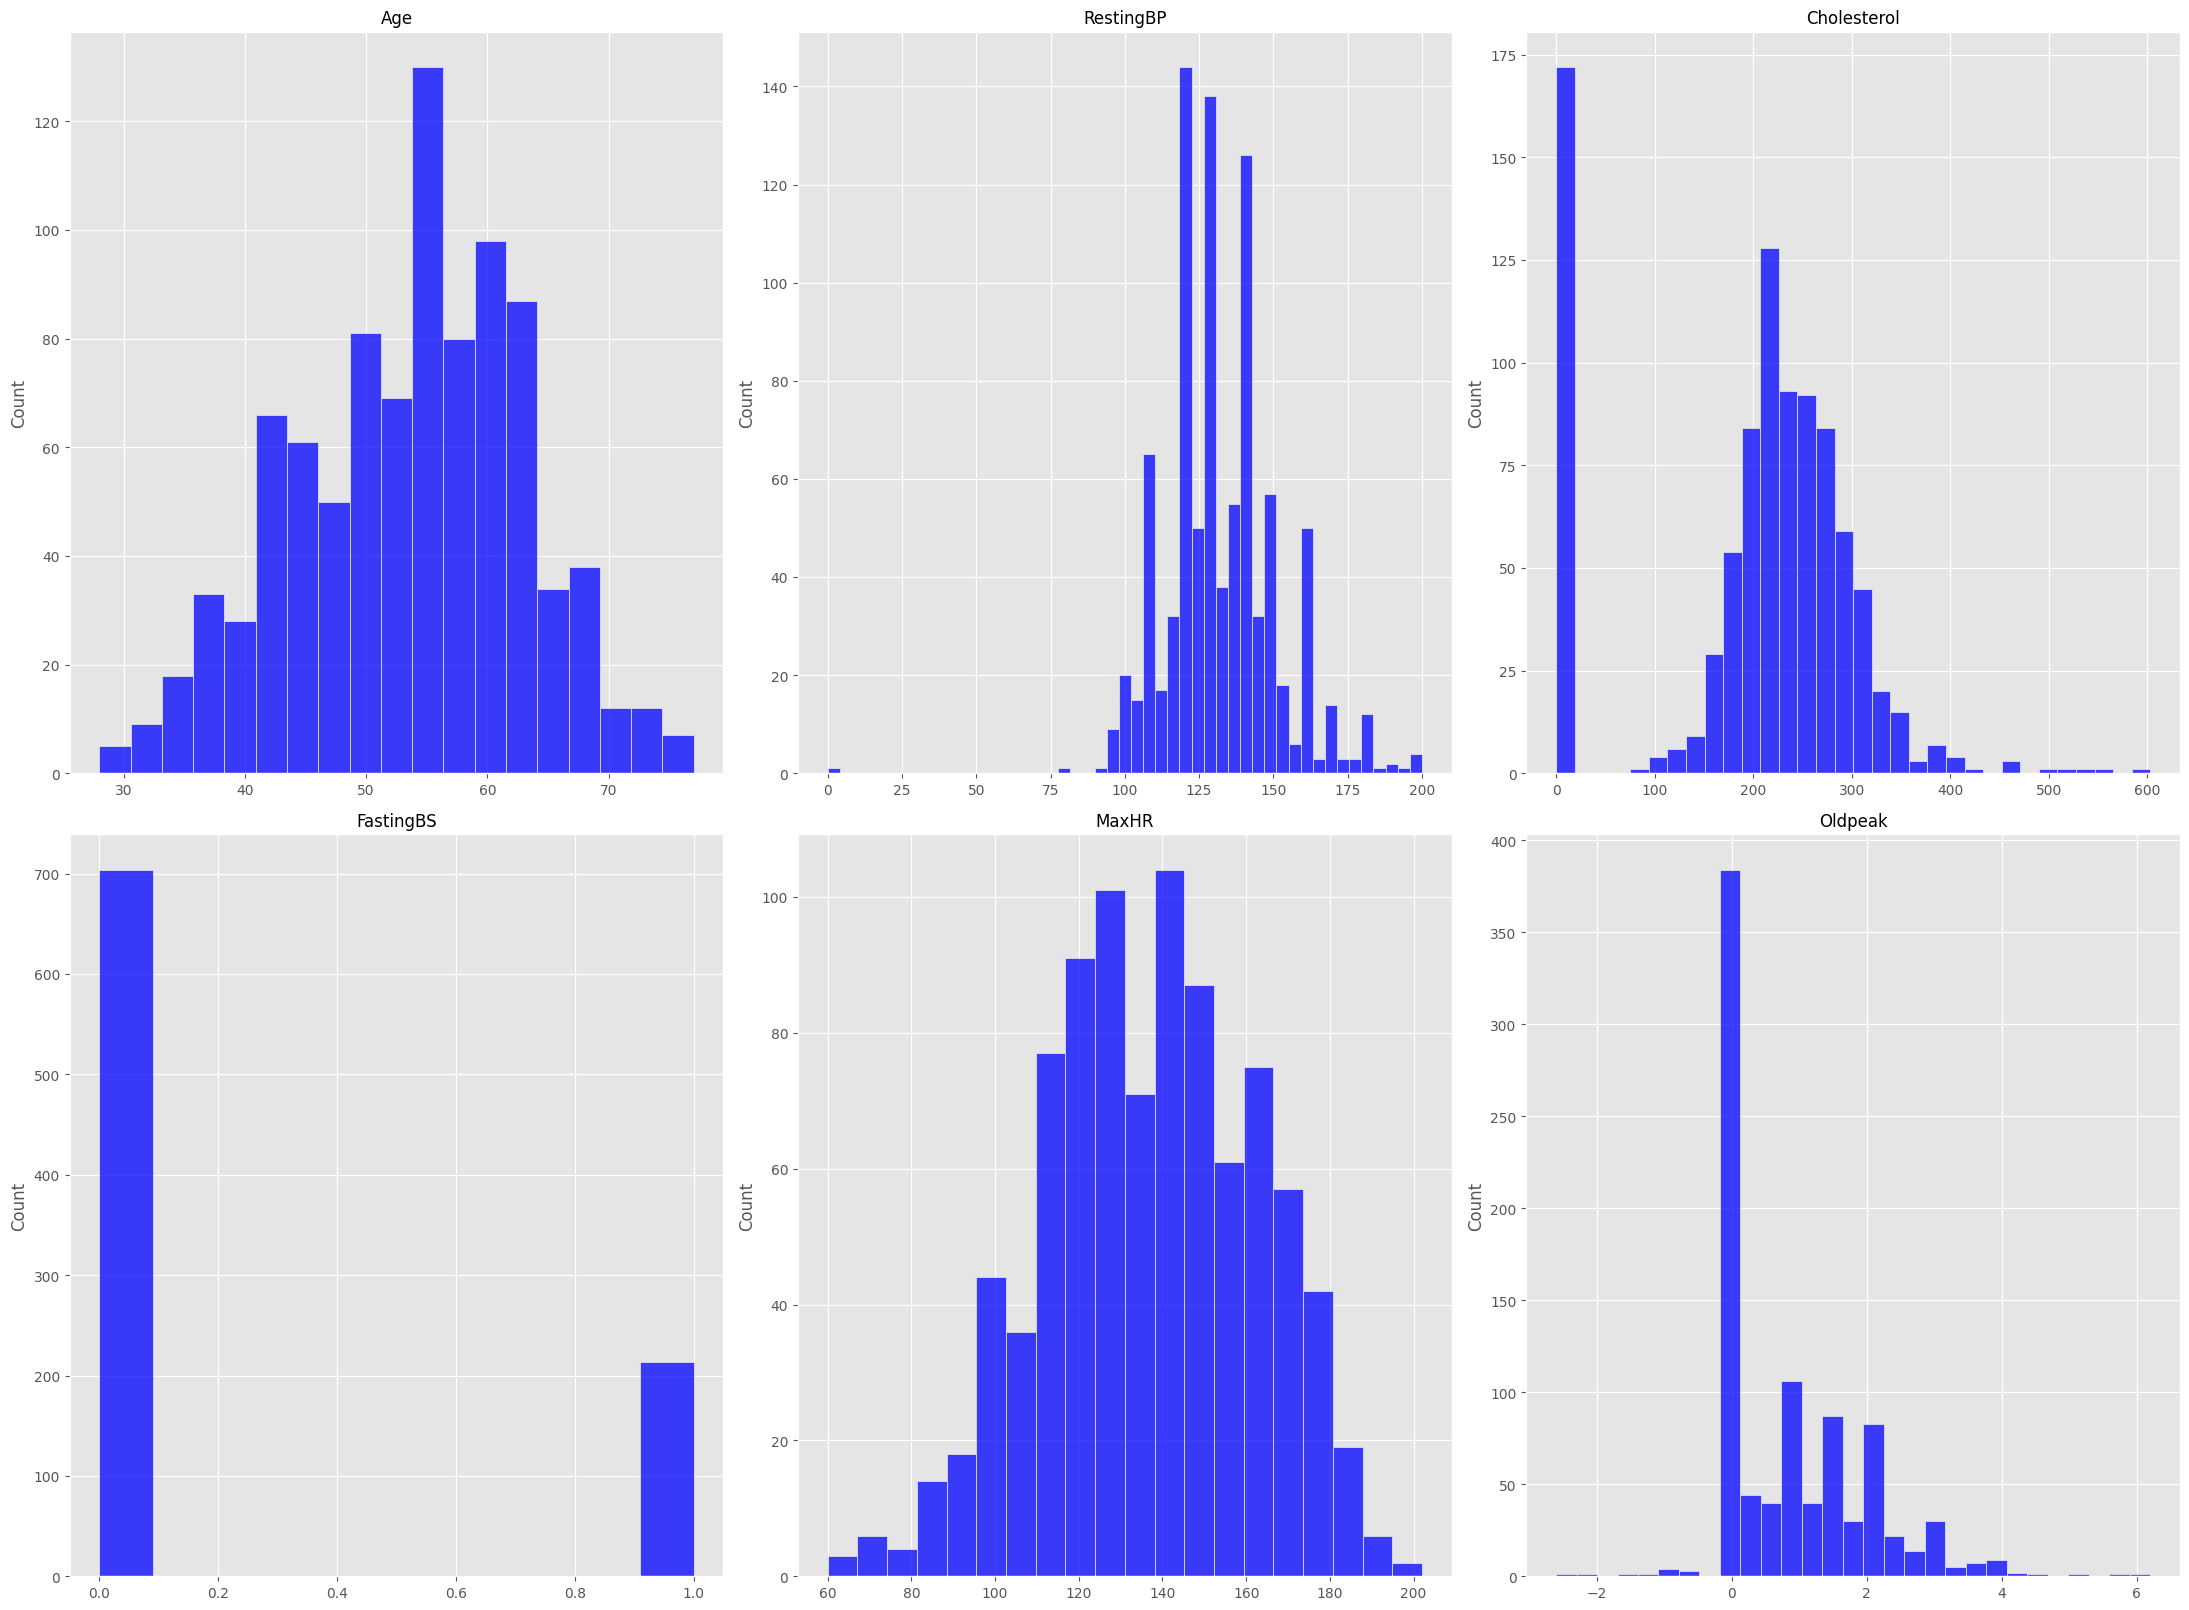

In [ ]:
plt.figure(figsize=(22,24))
plt.style.use('ggplot')

for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, color='blue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Distribusi data kategorikal menunjukkan ketimpangan pada beberapa fitur, seperti `ChestPainType` dan `ST_Slope`. Ketimpangan ini dapat memengaruhi kinerja model, sehingga perlu penanganan khusus. Salah satu cara efektif adalah menggunakan **One-Hot Encoding**, yang mengubah setiap kategori menjadi kolom biner tanpa memberi makna urutan. Pendekatan ini membantu model memahami setiap kategori secara adil dan mencegah bias terhadap kategori mayoritas.


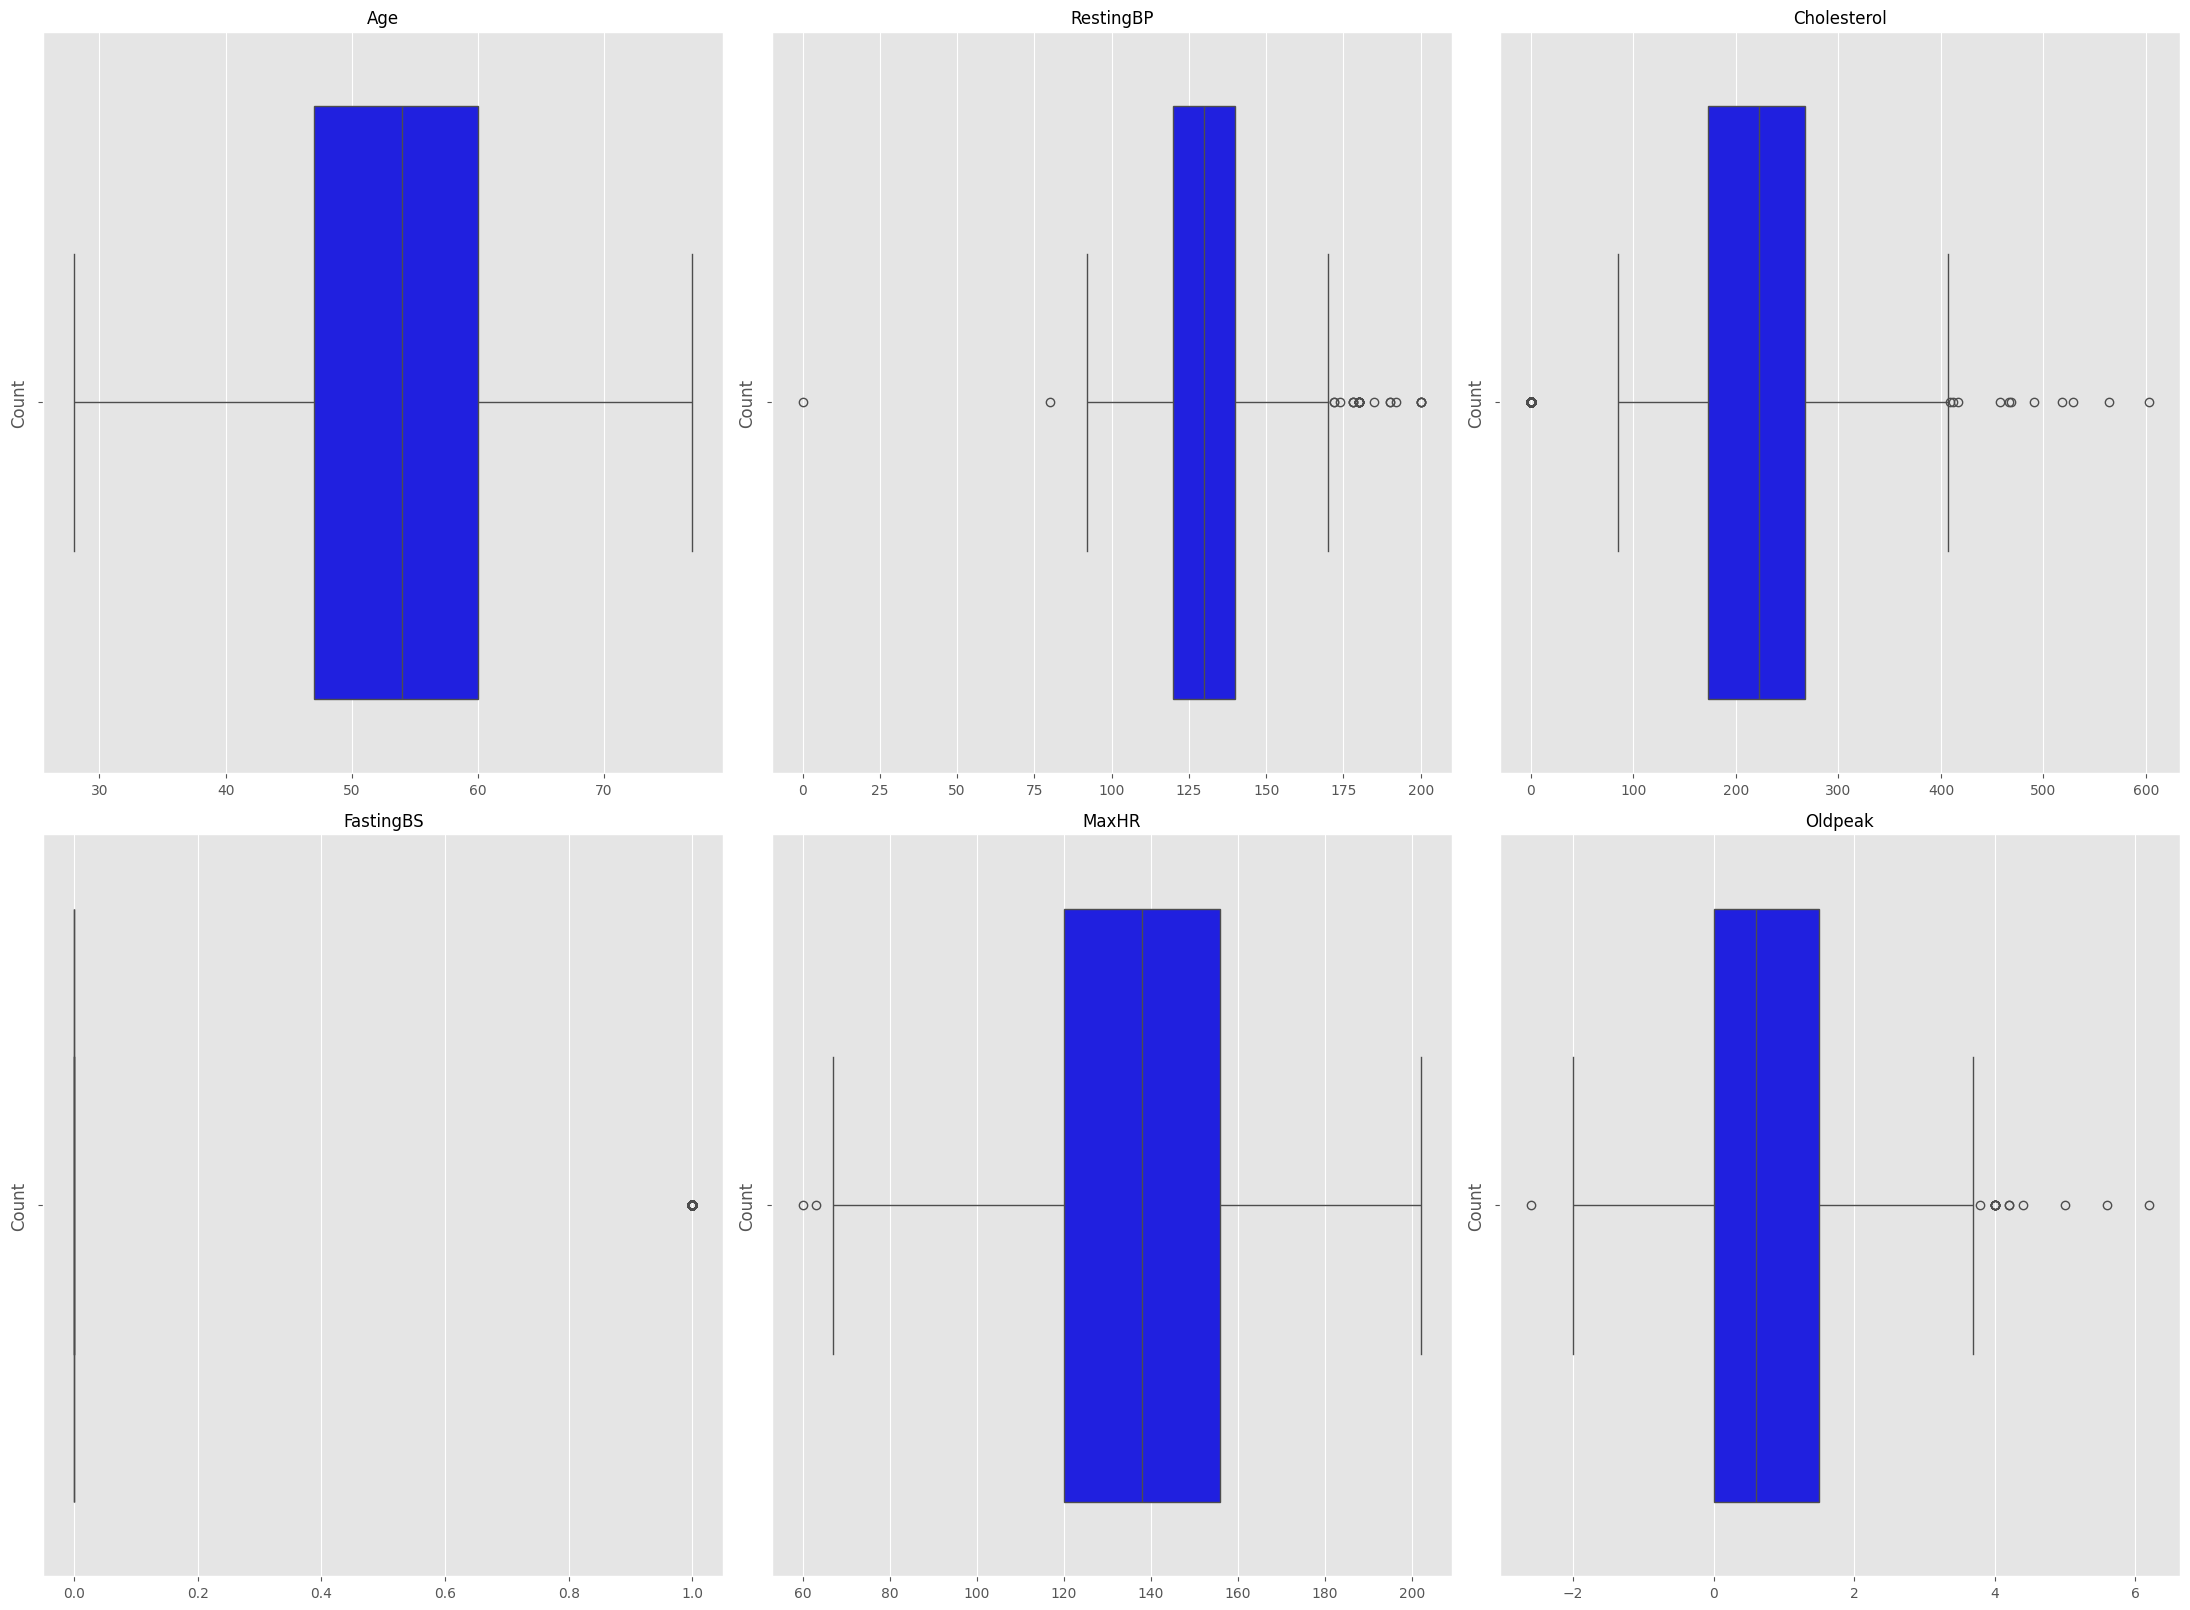

In [ ]:
plt.figure(figsize=(22,24))
plt.style.use('ggplot')

for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, color='blue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Boxplot menunjukkan bahwa sebagian besar fitur memiliki **outlier**, terutama pada `RestingBP`, `Cholesterol`, dan `Oldpeak`, sedangkan `Age` dan `MaxHR` memiliki sebaran yang relatif normal. Fitur `FastingBS` didominasi oleh nilai 0 dan minim variasi, sehingga dianggap tidak informatif dan akhirnya dihapus karena berpotensi tidak berkontribusi signifikan terhadap performa model.

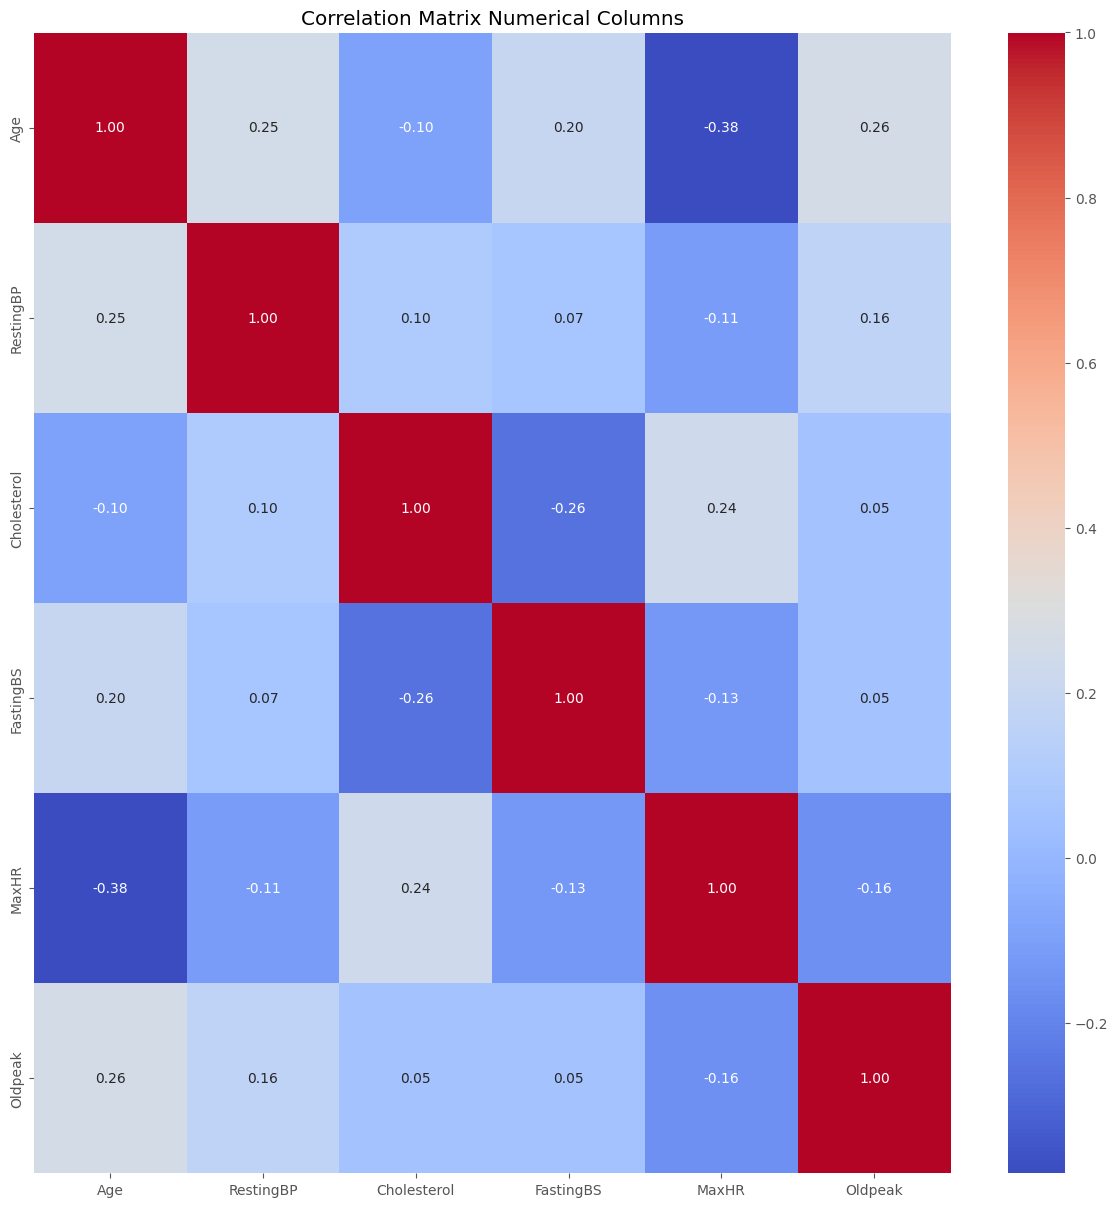

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[num_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.tight_layout()
plt.title("Correlation Matrix Numerical Columns")
plt.show()

Berdasarkan korelasi antar fitur numerik, tidak ditemukan fitur yang redundant dalam dataset ini. Nilai korelasi antar fitur mayoritas rendah, di bawah 0.3, sehingga setiap fitur memberikan informasi yang unik dan layak dipertahankan untuk analisis atau pemodelan.

In [ ]:
df.drop(['FastingBS'], axis=1, inplace=True)

##Multivariate Analysis

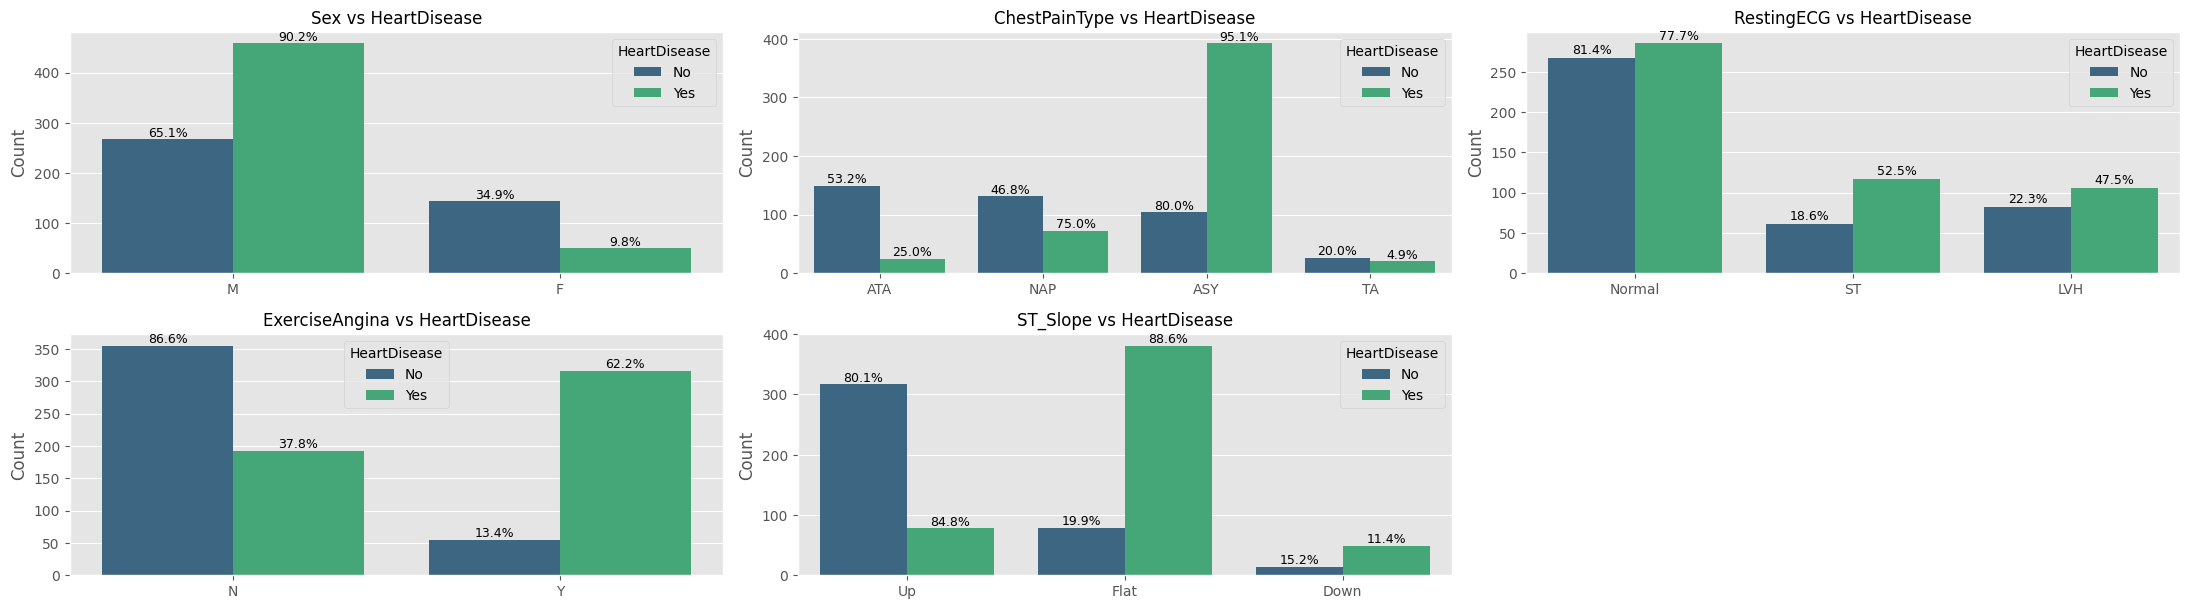

In [ ]:
plt.figure(figsize=(22, 12))
plt.style.use('ggplot')

for i, col in enumerate(cat_columns):
    plt.subplot(4, 3, i + 1)
    ax = sns.countplot(data=df, x=col, hue='HeartDisease', palette='viridis')
    plt.title(f'{col} vs HeartDisease', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='HeartDisease', labels=['No', 'Yes'])

    # Dapatkan jumlah kategori unik pada sumbu x
    n_categories = len(df[col].unique())
    # n_hue = 2 (HeartDisease: No, Yes)

    # Karena countplot dengan hue, jumlah bar = n_categories * n_hue
    n_hue = len(df['HeartDisease'].unique())

    # Bar patches diurutkan per kategori x dan per hue
    patches = ax.patches

    # Loop untuk tiap kategori
    for j in range(n_categories):
        # Index bar untuk kategori ke-j: dari j*n_hue sampai (j+1)*n_hue - 1
        start_idx = j * n_hue
        end_idx = start_idx + n_hue

        # Hitung total tinggi bar untuk kategori j
        total = sum(p.get_height() for p in patches[start_idx:end_idx])

        # Tambahkan label persentase di tiap bar kategori j
        for k in range(start_idx, end_idx):
            height = patches[k].get_height()
            if total > 0:
                percent = height / total * 100
                patches[k].set_height(height)  # optional, biar pasti
                ax.text(
                    patches[k].get_x() + patches[k].get_width() / 2,
                    height + 5,
                    f'{percent:.1f}%',
                    ha='center',
                    fontsize=9
                )

plt.tight_layout()
plt.show()

Berikut adalah penjelasan pada **indikasi** pengaruh variabel kategorikal terhadap distribusi **HeartDisease** :

### 1. **Sex vs HeartDisease**

* Pria (M) cenderung memiliki jumlah kasus penyakit jantung (HeartDisease = Yes) sebesar 90.2% yang jauh lebih banyak dibandingkan wanita (F) yang sebesar 9.8%.
* Wanita memiliki jumlah kasus negatif sebesar 34.9% (tidak ada penyakit jantung) yang lebih tinggi dibandingkan kasus positif yang sebesar 9.8%.

Indikasi: **Jenis kelamin pria mungkin terkait dengan risiko lebih tinggi terkena penyakit jantung**.

### 2. **ChestPainType vs HeartDisease**

* Tipe nyeri dada **ASY (Asymptomatic)** tampak terkait dengan jumlah kasus penyakit jantung yang cukup tinggi.
* Tipe ATA (Atypical angina), NAP (Non-anginal pain), dan TA (Typical angina) lebih sering muncul pada pasien tanpa penyakit jantung.

Indikasi: **Nyeri dada tipe Asymptomatic berpotensi menjadi indikator kuat penyakit jantung**.

### 3. **RestingECG vs HeartDisease**

* Pada kategori **Normal**, distribusi pasien dengan dan tanpa penyakit jantung tampak seimbang.
* Kategori **ST** dan **LVH** lebih banyak ditemukan pada pasien dengan penyakit jantung.

Indikasi: **Abnormalitas pada Resting ECG (ST, LVH) bisa mengindikasikan adanya penyakit jantung**.

### 4. **ExerciseAngina vs HeartDisease**

* Pasien dengan **ExerciseAngina = Y (ya)** cenderung lebih banyak yang positif penyakit jantung.
* Sebaliknya, pasien tanpa exercise angina (N) mayoritas tidak memiliki penyakit jantung.

Indikasi: **Exercise angina mungkin menjadi tanda yang cukup kuat adanya penyakit jantung**.

### 5. **ST\_Slope vs HeartDisease**

* Kategori **Flat** pada ST slope tampak terkait dengan jumlah kasus penyakit jantung yang tinggi.
* Kategori **Up** lebih sering ditemukan pada pasien tanpa penyakit jantung.
* Kategori **Down** juga lebih banyak pada pasien dengan penyakit jantung, meskipun jumlahnya lebih kecil dari Flat.

Indikasi: **ST slope Flat dan Down bisa menjadi indikator risiko penyakit jantung yang lebih tinggi dibandingkan slope Up**.

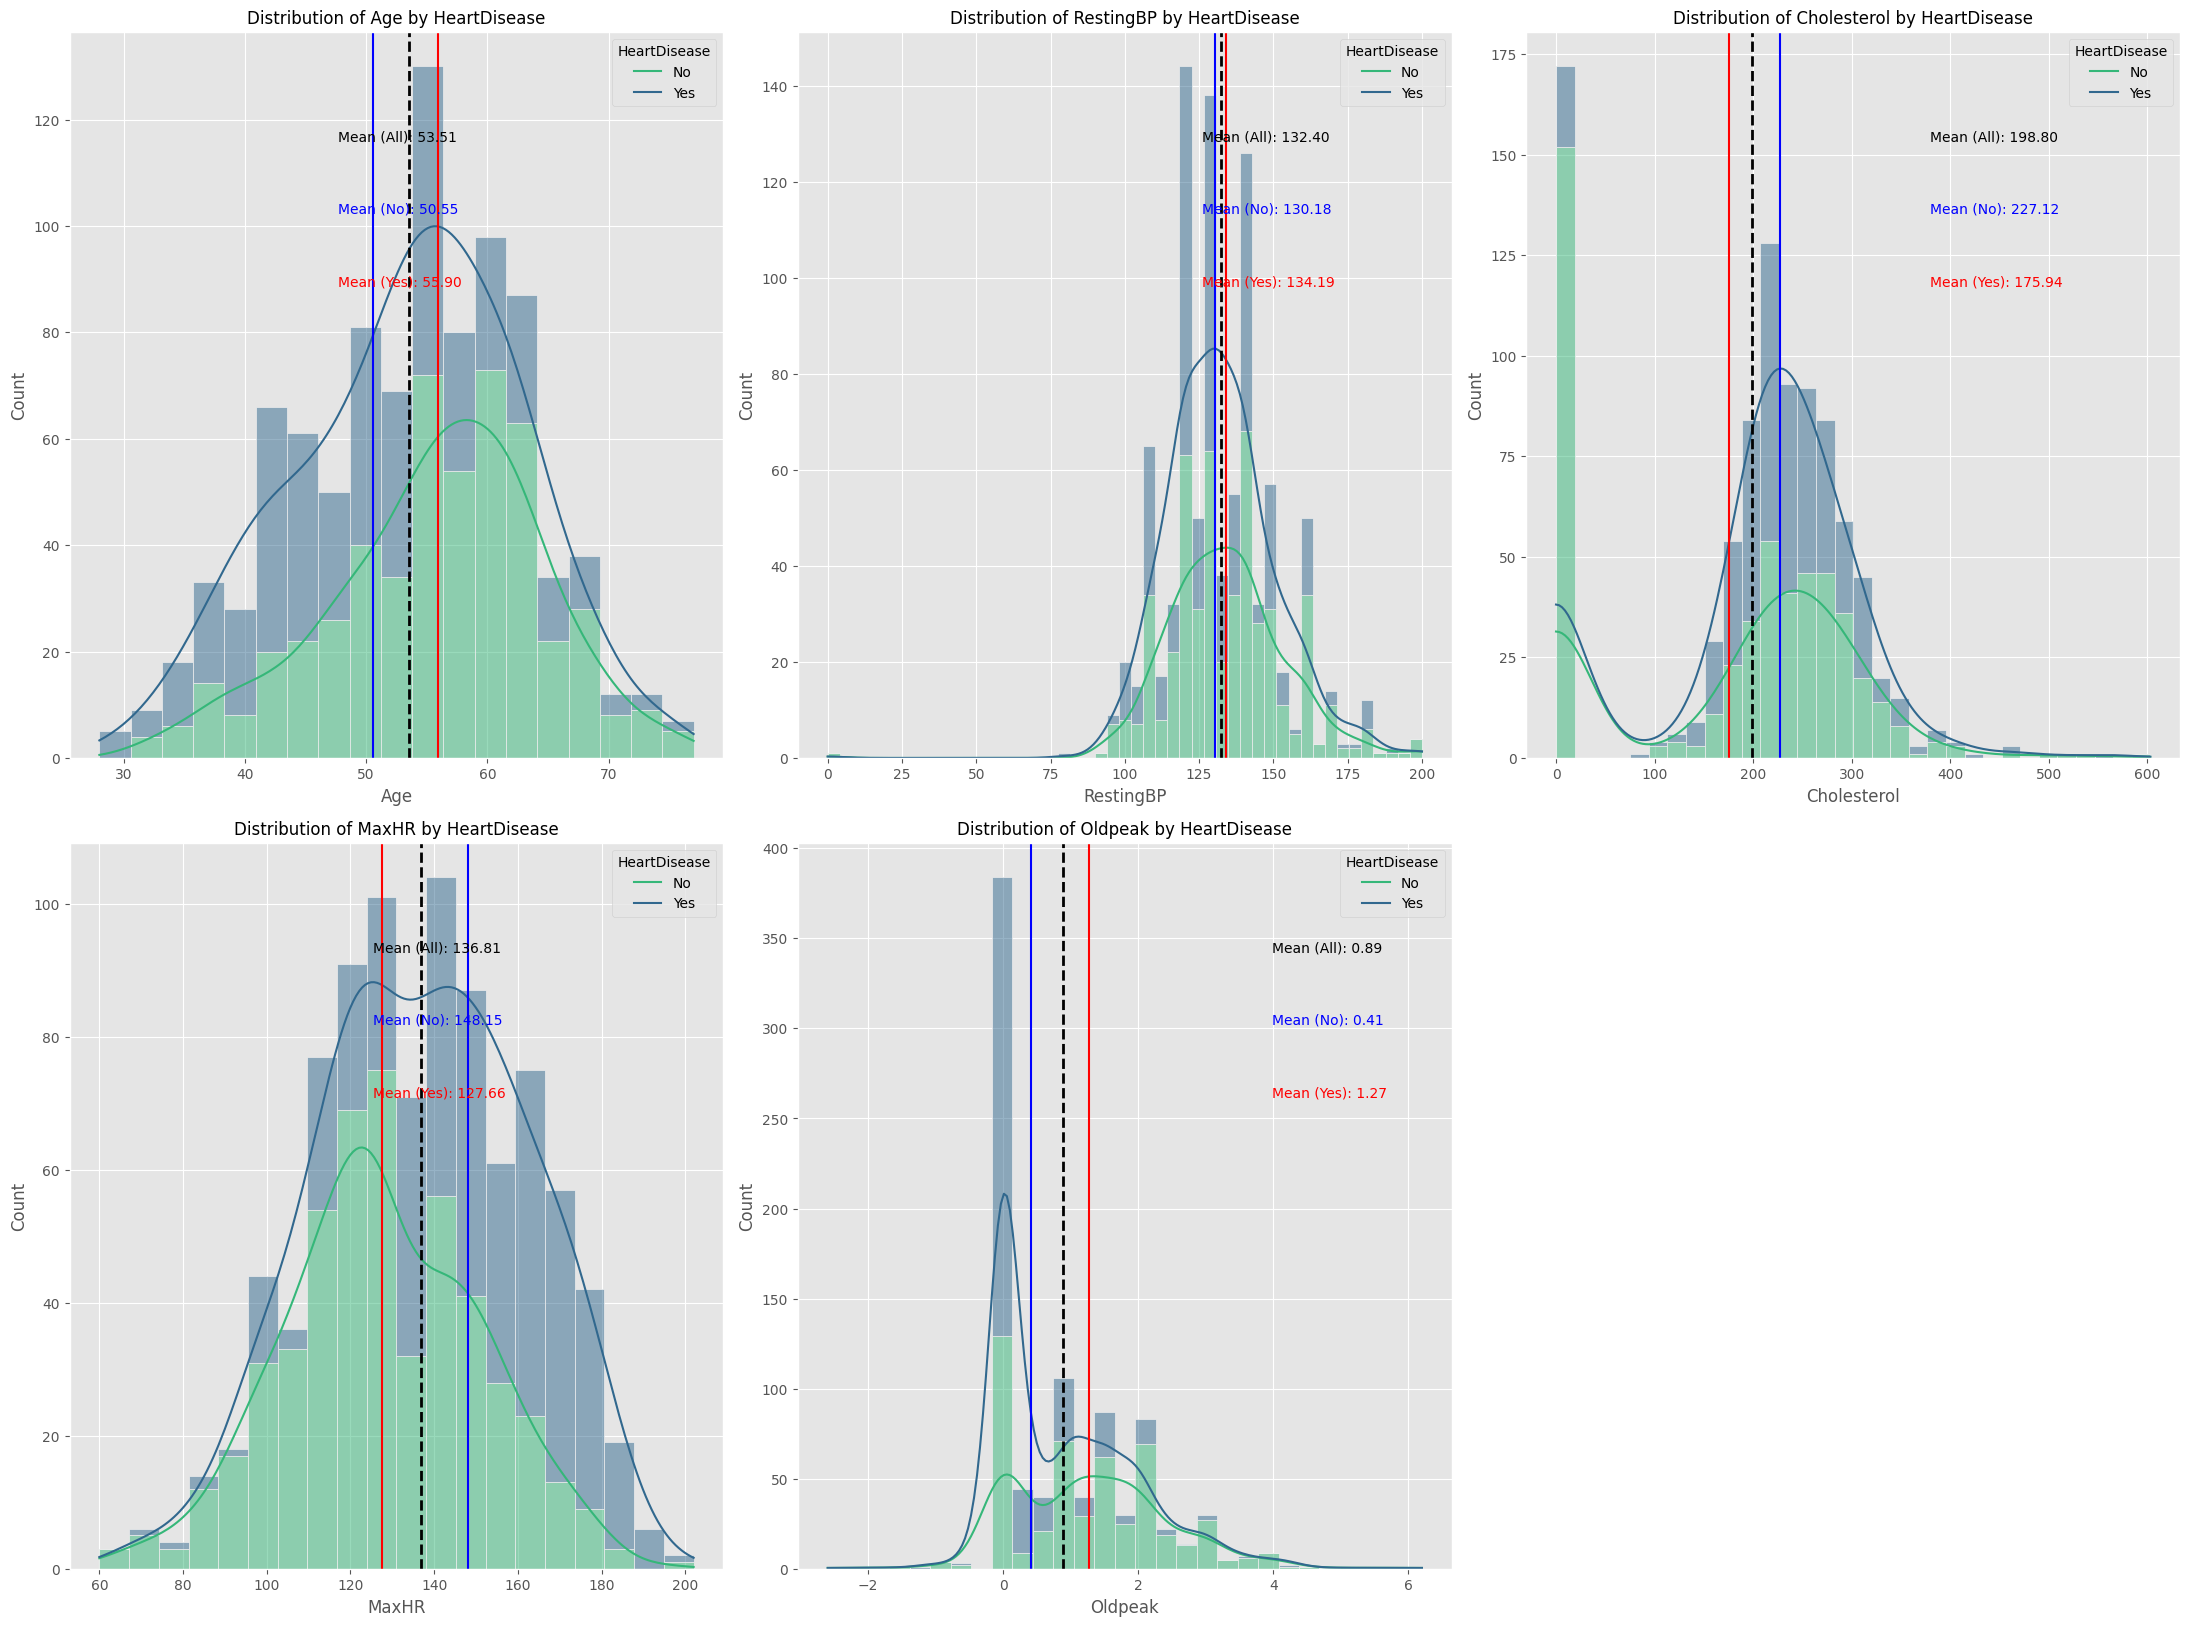

In [ ]:
num_columns = df.select_dtypes(include=np.number).columns.drop('HeartDisease')

plt.figure(figsize=(22, 24))
plt.style.use('ggplot')

for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, hue='HeartDisease', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribution of {col} by HeartDisease', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='HeartDisease', labels=['No', 'Yes'])

    # Mean untuk masing-masing grup dan keseluruhan
    mean_all = df[col].mean()
    mean_0 = df[df['HeartDisease'] == 0][col].mean()
    mean_1 = df[df['HeartDisease'] == 1][col].mean()

    # Garis vertikal
    plt.axvline(mean_all, color='black', linestyle='--', linewidth=2, label='Mean (All)')
    plt.axvline(mean_0, color='blue', linestyle='-', linewidth=1.5, label='Mean (No)')
    plt.axvline(mean_1, color='red', linestyle='-', linewidth=1.5, label='Mean (Yes)')

    # Teks rata-rata
    ymax = plt.ylim()[1]
    xpos = plt.xlim()[1] * 0.6
    plt.text(xpos, ymax * 0.85, f'Mean (All): {mean_all:.2f}', fontsize=10, color='black')
    plt.text(xpos, ymax * 0.75, f'Mean (No): {mean_0:.2f}', fontsize=10, color='blue')
    plt.text(xpos, ymax * 0.65, f'Mean (Yes): {mean_1:.2f}', fontsize=10, color='red')

plt.tight_layout()
plt.show()

**1. Age vs HeartDisease**
- Distribusi: Terlihat pergeseran ke kanan pada grup penderita HeartDisease = Yes, artinya penderita cenderung lebih tua dibandingkan yang tidak.
- Rata-rata:
  - All: 53.51
  - No: 50.55
  - Yes: 54.90

Pengaruh: Umur yang lebih tua meningkatkan kemungkinan terkena penyakit jantung, karena risiko penyakit jantung memang meningkat seiring bertambahnya usia.

**2. RestingBP vs HeartDisease**
- Distribusi: Kedua kelompok (HeartDisease = No dan Yes) memiliki distribusi yang mirip, namun terdapat sedikit pergeseran ke kanan pada kelompok HeartDisease = Yes, yang menunjukkan tekanan darah lebih tinggi.
- Rata-rata:
  - All: 132.40
  - No: 130.18
  - Yes: 134.19

Pengaruh: enderita penyakit jantung cenderung memiliki tekanan darah istirahat yang sedikit lebih tinggi. Meskipun perbedaannya tidak terlalu besar, tekanan darah yang meningkat dapat menjadi faktor risiko tambahan terhadap penyakit jantung, terutama jika dikombinasikan dengan faktor risiko lainnya.

**3. Cholesterol vs HeartDisease**
- Distribusi: Terlihat bahwa kelompok HeartDisease = No memiliki distribusi kolesterol yang lebih tinggi dibandingkan dengan kelompok HeartDisease = Yes, yang cukup mengejutkan karena bertentangan dengan asumsi umum.
- Rata-rata:
  - All: 198.80
  - No: 227.12
  - Yes: 175.94

Pengaruh: Secara mengejutkan, kolesterol rata-rata pada penderita penyakit jantung justru lebih rendah. Hal ini bisa disebabkan oleh berbagai faktor, seperti efek pengobatan yang menurunkan kolesterol, gaya hidup setelah diagnosis, atau distribusi data yang tidak merata. Oleh karena itu, kolesterol dalam dataset ini mungkin kurang representatif sebagai indikator tunggal untuk mendeteksi penyakit jantung.

**4. MaxHR vs HeartDisease**
- Distribusi: Distribusi menunjukkan bahwa kelompok HeartDisease = No memiliki detak jantung maksimum yang lebih tinggi, sedangkan kelompok HeartDisease = Yes cenderung memiliki MaxHR yang lebih rendah.
- Rata-rata:
  - All: 136.81
  - No: 148.15
  - Yes: 127.66

Pengaruh: Penderita penyakit jantung cenderung tidak mampu mencapai detak jantung maksimum yang tinggi saat beraktivitas fisik, yang bisa menjadi indikasi keterbatasan fungsi jantung. MaxHR yang lebih rendah merupakan sinyal penting adanya potensi gangguan jantung, sehingga fitur ini cukup signifikan dalam membedakan antara penderita dan non-penderita.

**5. Oldpeak vs HeartDisease**
- Distribusi: Sangat berbeda antar grup. Grup HeartDisease = Yes punya distribusi lebih menyebar ke kanan (nilai oldpeak lebih tinggi).
- Rata-rata:
  - All: 0.89
  - No: 0.41
  - Yes: 1.27

Pengaruh: Oldpeak tinggi mengindikasikan abnormalitas EKG akibat iskemia (kurangnya aliran darah ke jantung), sehingga sangat erat kaitannya dengan penyakit jantung. Ini adalah salah satu fitur yang paling membedakan kedua grup.

#Data Preprocessing

In [ ]:
df_prep = df.copy()
df_prep

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


## Handle Missing Values

In [ ]:
df_prep.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


Pada dataset terlihat tidak terdapat missing value.

## Handle Duplicated Values

In [ ]:
print(f'Jumlah data duplikat:', df_prep.duplicated().sum())

Jumlah data duplikat: 0


Pada dataset terlihat tidak terdapat data duplikat.

## Handle Outlier Values

In [ ]:
col_selected = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

for col in col_selected:
    df_prep = remove_outlier(df_prep, col)

Untuk menangani outlier, dilakukan penghapusan outlier pada kolom `RestingBP`, `Cholesterol`, `MaxHR` dan `Oldpeak` menggunakan metode IQR (Interquartile Range). Metode ini diterapkan untuk menghapus data yang berada di luar rentang batas bawah dan batas atas yang telah ditetapkan, sehingga menghasilkan data yang lebih rapi dan menggambarkan kondisi sebenarnya dengan lebih baik.

## Encoding Values

In [ ]:
df_prep.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label Encoding untuk kolom 'Sex' dan 'ExerciseAngina'
le_col = ['Sex',  'ExerciseAngina']

le = LabelEncoder()

for col in le_col:
    df_prep[col] = le.fit_transform(df_prep[col])

# Label Encoding untuk kolom 'ChestPainType', 'RestingECG' dan 'ST_Slope'
ohe_col = ['ChestPainType', 'RestingECG', 'ST_Slope']
df_prep = pd.get_dummies(df_prep, columns=ohe_col, dtype='int')

Di tahap ini, data kategori berupa teks atau label diubah menjadi format angka supaya bisa diproses oleh algoritma machine learning. Proses encoding pada fitur kategorikal dilakukan dalam dua tahap:

1. **Label Encoding**: mengubah nilai kategori menjadi bilangan bulat (seperti `0` dan `1`) pada variabel yang hanya memiliki dua kelas, berikut adalah kolomnya:
   - `Sex`
   - `ExerciseAngina`

2. One Hot Encoding: mengonversi setiap kategori menjadi kolom-kolom biner yang terpisah, digunakan untuk data kategori yang tidak memiliki urutan, berikut adalah kolomnya:
   - `ChestPainType`
   - `RestingECG`
   - `ST_Slope`

In [ ]:
df_prep.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_prep.shape

(701, 18)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_prep.drop('HeartDisease', axis=1)
y = df_prep['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi dengan rasio 80:20, di mana 80% dari data digunakan sebagai data pelatihan (training) untuk membangun dan mengoptimalkan model, sedangkan 20% sisanya dialokasikan sebagai data pengujian (testing). Pembagian ini bertujuan untuk memastikan proses evaluasi model berjalan secara objektif dan hasil pengujian mencerminkan kemampuan model dalam menghadapi data baru yang belum pernah dilihat sebelumnya. Dengan demikian, performa model dapat diukur secara akurat dan generalisasi model terhadap data nyata dapat dipantau.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(560, 17)
(141, 17)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dilakukan proses scaling menggunakan MinMaxScaler untuk menormalkan rentang nilai pada setiap fitur. Dengan metode ini, semua fitur diubah ke dalam skala yang seragam, biasanya antara 0 hingga 1, sehingga tidak ada fitur yang memiliki pengaruh berlebihan akibat perbedaan skala nilai. Hal ini membantu algoritma machine learning bekerja lebih efektif dan menghasilkan model yang lebih stabil.

In [ ]:
print(f'Jumlah data HeartDisease bernilai yes sebelum SMOTE: {y_train.value_counts()[1]}')
print(f'Jumlah data HeartDisease bernilai no sebelum SMOTE: {y_train.value_counts()[0]}')

Jumlah data HeartDisease bernilai yes sebelum SMOTE: 250
Jumlah data HeartDisease bernilai no sebelum SMOTE: 310


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

print(f'Jumlah data HeartDisease bernilai yes sesudah SMOTE: {y_train_smt.value_counts()[1]}')
print(f'Jumlah data HeartDisease bernilai no sesudah SMOTE: {y_train_smt.value_counts()[0]}')

Jumlah data HeartDisease bernilai yes sesudah SMOTE: 310
Jumlah data HeartDisease bernilai no sesudah SMOTE: 310


Untuk mengatasi ketidakseimbangan kelas pada data latih, digunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) yang menambahkan data sintetis pada kelas yang jumlahnya lebih sedikit. Selain itu, pengujian juga dilakukan pada data tanpa penerapan SMOTE guna membandingkan tingkat akurasi dan menilai sejauh mana metode ini efektif dalam meningkatkan performa model.

#Modeling

Pada tahap ini dilakukan pengujian terhadap beberapa algoritma klasifikasi, yaitu Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, Support Vector Classifier (SVC), K-Nearest Neighbors, Gaussian Naive Bayes, dan XGBoost. Tujuan dari pengujian ini adalah untuk mengevaluasi dan membandingkan performa masing-masing model guna menentukan algoritma yang paling efektif dalam menangani kasus prediksi serangan jantung.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Telah dibuat sebuah fungsi untuk melatih berbagai algoritma klasifikasi secara bersamaan, serta menghitung metrik performa pada data training dan data testing. Perbandingan hasil performa antara kedua data ini digunakan untuk menilai kemungkinan terjadinya overfitting atau underfitting pada masing-masing model.

In [ ]:
def train_model(X_train, y_train, X_test, y_test):
# Daftar model yang ingin diuji
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Support Vector Machine": SVC(random_state=42),
        "Naive Bayes": GaussianNB(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "XGBoost": XGBClassifier(random_state=42)
    }

    # List untuk menyimpan hasil
    results = []

    # Loop untuk training dan evaluasi tiap model
    for name, model in models.items():
        model.fit(X_train, y_train)

        # Prediksi untuk train dan test
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Simpan hasil ke list
        results.append({
            "model": name,
            "acc_train": accuracy_score(y_train, y_train_pred),
            "acc_test": accuracy_score(y_test, y_test_pred),
            "prec_train": precision_score(y_train, y_train_pred),
            "prec_test": precision_score(y_test, y_test_pred),
            "rec_train": recall_score(y_train, y_train_pred),
            "rec_test": recall_score(y_test, y_test_pred),
            "f1_train": f1_score(y_train, y_train_pred),
            "f1_test": f1_score(y_test, y_test_pred),
            "roc_train": roc_auc_score(y_train, y_train_pred),
            "roc_test": roc_auc_score(y_test, y_test_pred)
        })

    # Konversi hasil ke DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test'])
    return results_df

In [ ]:
results = train_model(X_train_smt, y_train_smt, X_test, y_test)
print(f'Dengan SMOTE')
results

Dengan SMOTE


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression,0.859677,0.872340,0.851735,0.858974,0.870968,0.905405,0.861244,0.881579,0.859677,0.870613
1,Decision Tree,1.000000,0.822695,1.000000,0.845070,1.000000,0.810811,1.000000,0.827586,1.000000,0.823316
2,Random Forest,1.000000,0.921986,1.000000,0.909091,1.000000,0.945946,1.000000,0.927152,1.000000,0.920734
3,AdaBoost,0.874194,0.851064,0.871795,0.853333,0.877419,0.864865,0.874598,0.859060,0.874194,0.850343
4,Gradient Boosting,0.966129,0.914894,0.955836,0.907895,0.977419,0.932432,0.966507,0.920000,0.966129,0.913977
5,Support Vector Machine,0.874194,0.886525,0.855828,0.853659,0.900000,0.945946,0.877358,0.897436,0.874194,0.883421
6,Naive Bayes,0.851613,0.872340,0.860927,0.850000,0.838710,0.918919,0.849673,0.883117,0.851613,0.869907
7,K-Nearest Neighbors,0.888710,0.900709,0.868502,0.865854,0.916129,0.959459,0.891680,0.910256,0.888710,0.897640
8,XGBoost,1.000000,0.872340,1.000000,0.878378,1.000000,0.878378,1.000000,0.878378,1.000000,0.872025


Setelah penerapan SMOTE, model **Random Forest** dan **Gradient Boosting** menunjukkan performa terbaik dengan recall di atas 93%, F1-score sekitar 92%, dan ROC AUC di atas 91%, menandakan kemampuan kuat dalam mendeteksi risiko penyakit jantung secara seimbang. Model **K-Nearest Neighbors** dan **Support Vector Machine** juga tampil kompetitif dengan recall dan F1-score tinggi. Sementara itu, **Decision Tree** mengalami overfitting dengan performa test yang lebih rendah dibanding training. Secara keseluruhan, SMOTE berhasil meningkatkan deteksi kelas minoritas, terutama pada model ensemble, sehingga meminimalkan kesalahan klasifikasi yang serius.

In [ ]:
results = train_model(X_train, y_train, X_test, y_test)
print(f'Tanpa SMOTE')
results

Tanpa SMOTE


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Logistic Regression,0.858929,0.886525,0.835294,0.891892,0.852,0.891892,0.843564,0.891892,0.858258,0.886244
1,Decision Tree,1.000000,0.808511,1.000000,0.840580,1.000,0.783784,1.000000,0.811189,1.000000,0.809802
2,Random Forest,1.000000,0.929078,1.000000,0.910256,1.000,0.959459,1.000000,0.934211,1.000000,0.927491
3,AdaBoost,0.867857,0.858156,0.860656,0.885714,0.840,0.837838,0.850202,0.861111,0.865161,0.859217
4,Gradient Boosting,0.964286,0.886525,0.952756,0.891892,0.968,0.891892,0.960317,0.891892,0.964645,0.886244
5,Support Vector Machine,0.878571,0.893617,0.844697,0.864198,0.892,0.945946,0.867704,0.903226,0.879871,0.890883
6,Naive Bayes,0.850000,0.879433,0.829365,0.860759,0.836,0.918919,0.832669,0.888889,0.848645,0.877370
7,K-Nearest Neighbors,0.875000,0.893617,0.843511,0.873418,0.884,0.932432,0.863281,0.901961,0.875871,0.891589
8,XGBoost,1.000000,0.865248,1.000000,0.866667,1.000,0.878378,1.000000,0.872483,1.000000,0.864562


Penerapan SMOTE secara umum meningkatkan kemampuan model dalam mendeteksi risiko penyakit jantung, terutama terlihat pada model Gradient Boosting dan K-Nearest Neighbors yang mengalami peningkatan recall dan F1-score, menandakan lebih baiknya identifikasi kasus positif kelas minoritas. Sebaliknya, model Random Forest menunjukkan performa sedikit menurun setelah SMOTE karena sudah memiliki hasil yang sangat baik tanpa oversampling. Meskipun demikian, SMOTE berhasil menjaga keseimbangan antara metrik presisi, recall, dan ROC AUC tanpa mengorbankan akurasi secara signifikan, sehingga menjadi teknik yang efektif untuk meningkatkan sensitivitas model terhadap kelas minoritas dalam dataset yang tidak seimbang.

## Random Forest  + Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 19, 'n_estimators': 483}

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        67
           1       0.88      0.96      0.92        74

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141

ROC AUC Score (Test): 0.9051028640580879


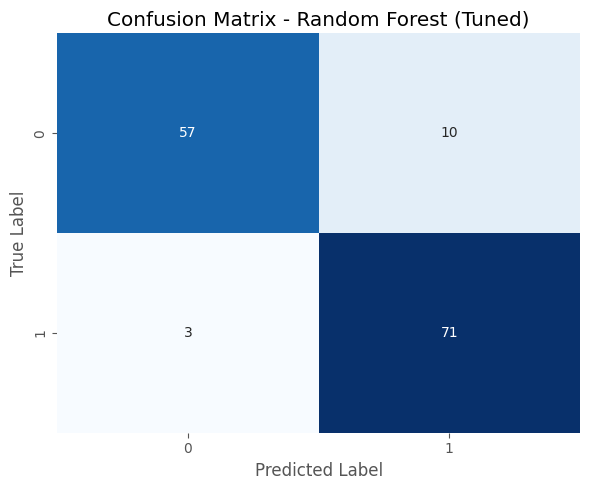


Hasil Evaluasi Model Random Forest (Tuned):


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Random Forest (Tuned),0.901786,0.907801,0.888446,0.876543,0.892,0.959459,0.89022,0.916129,0.900839,0.905103


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Definisikan ruang pencarian hyperparameter
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],  # Hapus 'auto'
    'bootstrap': [True, False]
}

# Inisialisasi RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Latih model dengan data training
random_search_rf.fit(X_train, y_train)

# Model terbaik
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Tampilkan hasil tuning
print("Best Hyperparameters for Random Forest:")
print(best_rf_params)

# Evaluasi model terbaik
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Buat dataframe hasil evaluasi
results_rf_df = pd.DataFrame([{
    "model": "Random Forest (Tuned)",
    "acc_train": accuracy_score(y_train, y_train_pred),
    "acc_test": accuracy_score(y_test, y_test_pred),
    "prec_train": precision_score(y_train, y_train_pred),
    "prec_test": precision_score(y_test, y_test_pred),
    "rec_train": recall_score(y_train, y_train_pred),
    "rec_test": recall_score(y_test, y_test_pred),
    "f1_train": f1_score(y_train, y_train_pred),
    "f1_test": f1_score(y_test, y_test_pred),
    "roc_train": roc_auc_score(y_train, y_train_pred),
    "roc_test": roc_auc_score(y_test, y_test_pred)
}], columns=[
    'model', 'acc_train', 'acc_test',
    'prec_train', 'prec_test',
    'rec_train', 'rec_test',
    'f1_train', 'f1_test',
    'roc_train', 'roc_test'
])

# Tampilkan classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Tampilkan hasil evaluasi
print("\nHasil Evaluasi Model Random Forest (Tuned):")
results_rf_df

In [69]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definisikan scorer untuk cross_validate (sama seperti sebelumnya)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Jalankan cross-validation dengan model terbaik Random Forest
cv_results_rf = cross_validate(
    best_rf_model,
    X_train, y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Cetak hasil cross-validation
print("\nCross-Validation Scores (5-Fold) for Random Forest:")
for metric in scoring.keys():
    scores = cv_results_rf[f'test_{metric}']
    print(f"{metric.capitalize():<10}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")


Cross-Validation Scores (5-Fold) for Random Forest:
Accuracy  : Mean = 0.8554, Std = 0.0236
Precision : Mean = 0.8308, Std = 0.0399
Recall    : Mean = 0.8520, Std = 0.0325
F1        : Mean = 0.8404, Std = 0.0249
Roc_auc   : Mean = 0.8550, Std = 0.0227


## Gradient Boosting  + Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Gradient Boosting:
{'learning_rate': np.float64(0.014789875666064259), 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 8, 'n_estimators': 363, 'subsample': np.float64(0.6137554084460873)}

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.92      0.92      0.92        74

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141

ROC AUC Score (Test): 0.9146833400564743


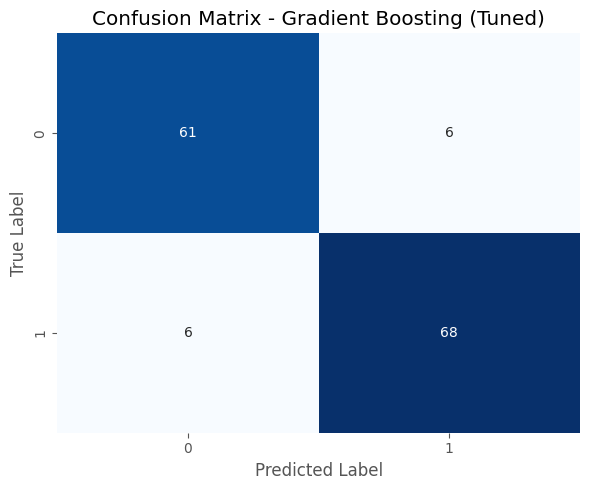


Hasil Evaluasi Model Gradient Boosting (Tuned):


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,Gradient Boosting (Tuned),0.941071,0.914894,0.92549,0.918919,0.944,0.918919,0.934653,0.918919,0.941355,0.914683


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)
from scipy.stats import randint, uniform
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inisialisasi model Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Definisikan ruang pencarian hyperparameter
param_dist = {
    'n_estimators': randint(100, 500),            # jumlah pohon
    'learning_rate': uniform(0.01, 0.3),          # learning rate
    'max_depth': randint(3, 15),                   # kedalaman maksimal tiap pohon
    'min_samples_split': randint(2, 20),           # minimal sampel untuk split
    'min_samples_leaf': randint(1, 20),            # minimal sampel di daun
    'subsample': uniform(0.6, 0.4),                # proporsi data yang digunakan tiap pohon
}

# Inisialisasi RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Latih model dengan data training
random_search_gb.fit(X_train, y_train)

# Model terbaik
best_gb_model = random_search_gb.best_estimator_
best_gb_params = random_search_gb.best_params_

# Tampilkan hasil tuning
print("Best Hyperparameters for Gradient Boosting:")
print(best_gb_params)

# Evaluasi model terbaik
y_train_pred = best_gb_model.predict(X_train)
y_test_pred = best_gb_model.predict(X_test)

# Buat dataframe hasil evaluasi
results_gb_df = pd.DataFrame([{
    "model": "Gradient Boosting (Tuned)",
    "acc_train": accuracy_score(y_train, y_train_pred),
    "acc_test": accuracy_score(y_test, y_test_pred),
    "prec_train": precision_score(y_train, y_train_pred),
    "prec_test": precision_score(y_test, y_test_pred),
    "rec_train": recall_score(y_train, y_train_pred),
    "rec_test": recall_score(y_test, y_test_pred),
    "f1_train": f1_score(y_train, y_train_pred),
    "f1_test": f1_score(y_test, y_test_pred),
    "roc_train": roc_auc_score(y_train, y_train_pred),
    "roc_test": roc_auc_score(y_test, y_test_pred)
}], columns=[
    'model', 'acc_train', 'acc_test',
    'prec_train', 'prec_test',
    'rec_train', 'rec_test',
    'f1_train', 'f1_test',
    'roc_train', 'roc_test'
])

# Tampilkan classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Tampilkan hasil evaluasi
print("\nHasil Evaluasi Model Gradient Boosting (Tuned):")
results_gb_df

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definisikan scorer untuk cross_validate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Jalankan cross-validation dengan model terbaik hasil tuning
cv_results = cross_validate(
    best_gb_model,       # model terbaik hasil tuning
    X_train, y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Hitung mean dan std untuk setiap metrik
print("Cross-Validation Scores (5-Fold):")
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<10}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")

Cross-Validation Scores (5-Fold):
Accuracy  : Mean = 0.8536, Std = 0.0291
Precision : Mean = 0.8391, Std = 0.0524
Recall    : Mean = 0.8360, Std = 0.0294
F1        : Mean = 0.8365, Std = 0.0303
Roc_auc   : Mean = 0.8519, Std = 0.0275


## K-Nearest Neighbors  + Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for K-Nearest Neighbors:
{'leaf_size': 11, 'n_neighbors': 26, 'p': 2, 'weights': 'distance'}

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.89      0.95      0.92        74

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141

ROC AUC Score (Test): 0.9058087938684956


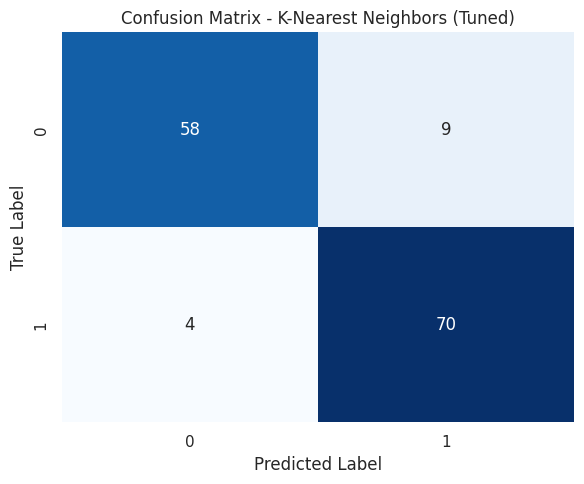


Hasil Evaluasi Model K-Nearest Neighbors (Tuned):


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
0,K-Nearest Neighbors (Tuned),1.0,0.907801,1.0,0.886076,1.0,0.945946,1.0,0.915033,1.0,0.905809


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix
)
from scipy.stats import randint, uniform
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier()

# Definisikan ruang pencarian hyperparameter
param_dist_knn = {
    'n_neighbors': randint(3, 30),          # jumlah tetangga
    'weights': ['uniform', 'distance'],     # bobot tetangga
    'p': [1, 2],                            # parameter jarak: 1=Manhattan, 2=Euclidean
    'leaf_size': randint(10, 50),           # ukuran daun untuk pohon pencarian
}

# Inisialisasi RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_knn,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Latih model dengan data training
random_search_knn.fit(X_train, y_train)

# Model terbaik
best_knn_model = random_search_knn.best_estimator_
best_knn_params = random_search_knn.best_params_

# Tampilkan hasil tuning
print("Best Hyperparameters for K-Nearest Neighbors:")
print(best_knn_params)

# Evaluasi model terbaik
y_train_pred_knn = best_knn_model.predict(X_train)
y_test_pred_knn = best_knn_model.predict(X_test)

# Buat dataframe hasil evaluasi
results_knn_df = pd.DataFrame([{
    "model": "K-Nearest Neighbors (Tuned)",
    "acc_train": accuracy_score(y_train, y_train_pred_knn),
    "acc_test": accuracy_score(y_test, y_test_pred_knn),
    "prec_train": precision_score(y_train, y_train_pred_knn),
    "prec_test": precision_score(y_test, y_test_pred_knn),
    "rec_train": recall_score(y_train, y_train_pred_knn),
    "rec_test": recall_score(y_test, y_test_pred_knn),
    "f1_train": f1_score(y_train, y_train_pred_knn),
    "f1_test": f1_score(y_test, y_test_pred_knn),
    "roc_train": roc_auc_score(y_train, y_train_pred_knn),
    "roc_test": roc_auc_score(y_test, y_test_pred_knn)
}], columns=[
    'model', 'acc_train', 'acc_test',
    'prec_train', 'prec_test',
    'rec_train', 'rec_test',
    'f1_train', 'f1_test',
    'roc_train', 'roc_test'
])

# Tampilkan classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_knn))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - K-Nearest Neighbors (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Tampilkan hasil evaluasi
print("\nHasil Evaluasi Model K-Nearest Neighbors (Tuned):")
results_knn_df

In [79]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definisikan scorer untuk cross_validate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Jalankan cross-validation dengan model terbaik KNN hasil tuning
cv_results_knn = cross_validate(
    best_knn_model,    # model terbaik hasil tuning KNN
    X_train, y_train,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Hitung mean dan std untuk setiap metrik
print("Cross-Validation Scores K-Nearest Neighbors (5-Fold):")
for metric in scoring.keys():
    scores = cv_results_knn[f'test_{metric}']
    print(f"{metric.capitalize():<10}: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")

Cross-Validation Scores K-Nearest Neighbors (5-Fold):
Accuracy  : Mean = 0.8446, Std = 0.0166
Precision : Mean = 0.8127, Std = 0.0149
Recall    : Mean = 0.8480, Std = 0.0466
F1        : Mean = 0.8292, Std = 0.0221
Roc_auc   : Mean = 0.8450, Std = 0.0190


## Perbandingan algoritma `Random Forest`, `Gradient Boosting`, dan `K-Nearest Neighbors` sebelum dan sesudah di hyperparameter tuning

In [80]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform

# Buat dataframe hasil evaluasi untuk model Random Forest sebelum tuning
results_rf_before_tuning = results[results['model'] == 'Random Forest'].copy()
results_rf_before_tuning['model'] = 'Random Forest (Before Tuning)'

# Gabungkan hasil sebelum dan sesudah tuning
comparison_rf = pd.concat([results_rf_before_tuning, results_rf_df])

# Buat dataframe hasil evaluasi untuk model Gradient Boosting sebelum tuning
results_gb_before_tuning = results[results['model'] == 'Gradient Boosting'].copy()
results_gb_before_tuning['model'] = 'Gradient Boosting (Before Tuning)'

# Gabungkan hasil Gradient Boosting sebelum dan sesudah tuning
comparison_gb = pd.concat([results_gb_before_tuning, results_gb_df])

# Buat dataframe hasil evaluasi untuk model K-Nearest Neighbors sebelum tuning
results_knn_before_tuning = results[results['model'] == 'K-Nearest Neighbors'].copy()
results_knn_before_tuning['model'] = 'K-Nearest Neighbors (Before Tuning)'

# Gabungkan hasil K-Nearest Neighbors sebelum dan sesudah tuning
comparison_knn = pd.concat([results_knn_before_tuning, results_knn_df])

# Gabungkan perbandingan Random Forest dan Gradient Boosting
comparison_all = pd.concat([comparison_rf, comparison_gb, comparison_knn])

# Tampilkan perbandingan keseluruhan
print("\nPerbandingan Performa Model Random Forest, Gradient Boosting dan K-Nearest Neighbors (Sebelum vs Sesudah Tuning):")
comparison_all[['model', 'acc_train', 'acc_test', 'prec_train', 'prec_test', 'rec_train', 'rec_test', 'f1_train', 'f1_test', 'roc_train', 'roc_test']]


Perbandingan Performa Model Random Forest, Gradient Boosting dan K-Nearest Neighbors (Sebelum vs Sesudah Tuning):


,model,acc_train,acc_test,prec_train,prec_test,rec_train,rec_test,f1_train,f1_test,roc_train,roc_test
2,Random Forest (Before Tuning),1.000000,0.929078,1.000000,0.910256,1.000,0.959459,1.000000,0.934211,1.000000,0.927491
0,Random Forest (Tuned),0.901786,0.907801,0.888446,0.876543,0.892,0.959459,0.890220,0.916129,0.900839,0.905103
4,Gradient Boosting (Before Tuning),0.964286,0.886525,0.952756,0.891892,0.968,0.891892,0.960317,0.891892,0.964645,0.886244
0,Gradient Boosting (Tuned),0.941071,0.914894,0.925490,0.918919,0.944,0.918919,0.934653,0.918919,0.941355,0.914683
7,K-Nearest Neighbors (Before Tuning),0.875000,0.893617,0.843511,0.873418,0.884,0.932432,0.863281,0.901961,0.875871,0.891589
0,K-Nearest Neighbors (Tuned),1.000000,0.907801,1.000000,0.886076,1.000,0.945946,1.000000,0.915033,1.000000,0.905809


Setelah dilakukan tuning, model **Random Forest** dan **Gradient Boosting** menunjukkan penurunan performa pada data training yang menandakan berkurangnya overfitting, sekaligus mengalami peningkatan atau stabilitas performa pada data testing sehingga model menjadi lebih general dan handal di data nyata. Sebaliknya, model **K-Nearest Neighbors (KNN)** setelah tuning justru mengalami peningkatan akurasi training sampai 100%, yang mengindikasikan overfitting, namun performa testing-nya juga meningkat sedikit.

Secara keseluruhan, tuning membantu meningkatkan keseimbangan antara performa training dan testing pada Random Forest dan Gradient Boosting, sedangkan pada KNN tuning memperkuat model di training sekaligus sedikit memperbaiki hasil testing.

Penggunaan metrik **recall** sangat penting untuk memastikan model mampu menangkap sebanyak mungkin kasus positif, sementara **F1 Score** sangat sesuai untuk menjaga keseimbangan antara False Positive dan False Negative, terutama dalam konteks deteksi risiko penyakit jantung. Berdasarkan hasil evaluasi, model **Gradient Boosting** mencapai **recall sebesar 0,92**, **F1 Score sebesar 0,92**, dan **ROC AUC sebesar 0,91**, yang menunjukkan bahwa model ini memiliki kepekaan tinggi dalam mendeteksi kasus positif sekaligus performa klasifikasi yang kuat dibandingkan model lain.

## Membandingkan algoritma `Random Forest`, `Gradient Boosting`, dan `K-Nearest Neighbors` setelah di hyperparameter tuning

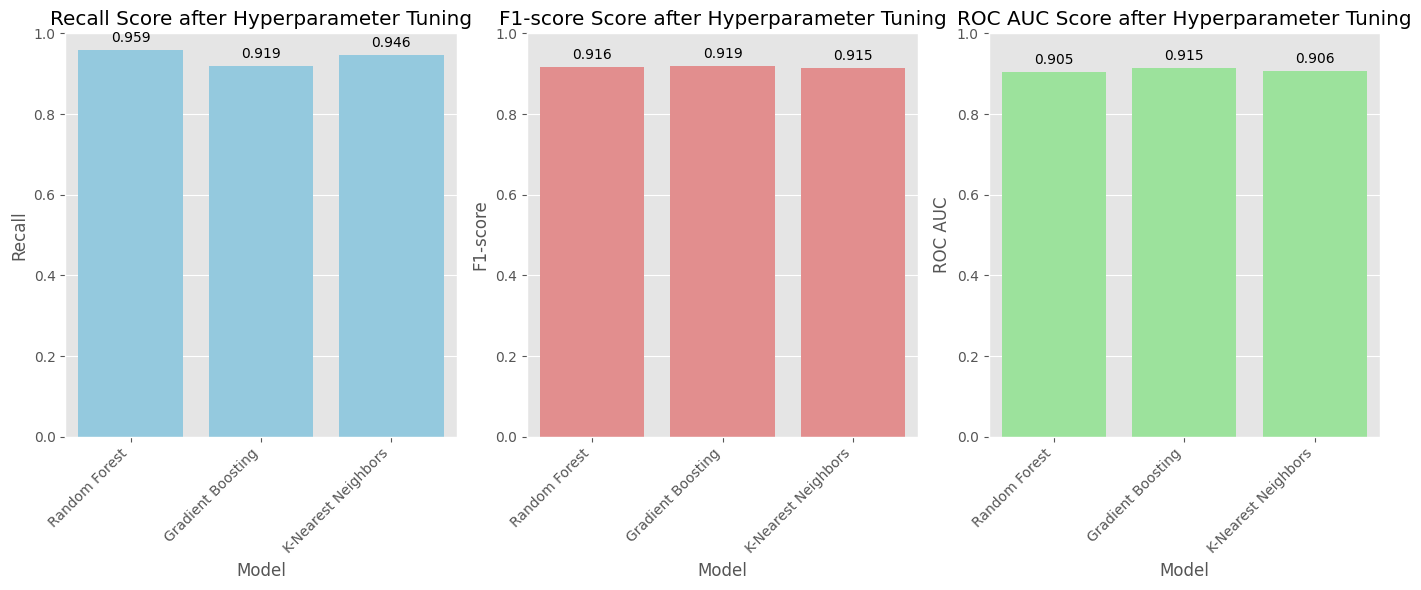

In [39]:
# Kumpulkan hasil evaluasi dari setiap model tuning
tuned_results = {
    "Random Forest": {
        "Recall": recall_score(y_test, best_rf_model.predict(X_test)),
        "F1-score": f1_score(y_test, best_rf_model.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, best_rf_model.predict(X_test))
    },
    "Gradient Boosting": {
        "Recall": recall_score(y_test, best_gb_model.predict(X_test)),
        "F1-score": f1_score(y_test, best_gb_model.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, best_gb_model.predict(X_test))
    },
    "K-Nearest Neighbors": {
        "Recall": recall_score(y_test, best_knn_model.predict(X_test)),
        "F1-score": f1_score(y_test, best_knn_model.predict(X_test)),
        "ROC AUC": roc_auc_score(y_test, best_knn_model.predict(X_test))
    }
}

# Konversi ke DataFrame untuk visualisasi
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
tuned_results_df = tuned_results_df.reset_index().rename(columns={'index': 'Model'})

# Visualisasi
metrics = ['Recall', 'F1-score', 'ROC AUC']
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, data=tuned_results_df, color=colors[i])
    plt.title(f'{metric} Score after Hyperparameter Tuning')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Metrik ini umumnya berada antara 0 dan 1
    plt.xticks(rotation=45, ha='right')

    # Menambahkan nilai di atas bar
    for index, row in tuned_results_df.iterrows():
        plt.text(index, row[metric] + 0.02, f'{row[metric]:.3f}', color='black', ha="center")

plt.tight_layout()
plt.show()

# Evaluation

Algoritma yang dipilih sebagai model dalam pembuatan machine learning ini adalah `Gradient Boosting`. Pada tahap evaluasi, metrik yang difokuskan adalah **recall**, **F1-score**, dan **ROC-AUC score**. Pemilihan **recall** dilakukan untuk memastikan model mampu menangkap sebanyak mungkin kasus positif, **F1-score** dipilih karena mampu menyeimbangkan antara presisi dan recall pada data yang tidak seimbang, sedangkan **ROC-AUC** digunakan untuk mengukur kemampuan model dalam membedakan kelas secara keseluruhan, khususnya dalam kasus klasifikasi biner seperti ini.


Recall Score: 0.92
F1-Score: 0.92
ROC-AUC Score: 0.91
Classification Report:
                  precision    recall  f1-score   support

Not Heart Attack       0.91      0.91      0.91        67
    Heart Attack       0.92      0.92      0.92        74

        accuracy                           0.91       141
       macro avg       0.91      0.91      0.91       141
    weighted avg       0.91      0.91      0.91       141



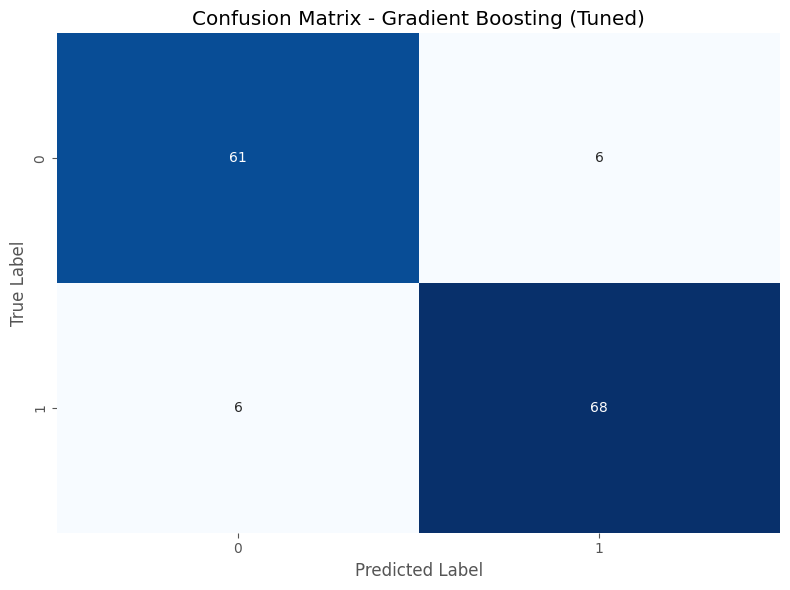

In [40]:
# Prediksi data uji menggunakan model Gradient Boosting yang sudah dituning
y_pred_test = best_gb_model.predict(X_test)

# Hitung F1-score dan ROC-AUC score
rec_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)
roc_test = round(roc_auc_score(y_test, y_pred_test), 2)

# Buat classification report
resume = classification_report(
    y_test,
    y_pred_test,
    target_names=['Not Heart Attack', 'Heart Attack']  # ubah sesuai label
)

# Tampilkan hasil evaluasi
print(f'Recall Score: {rec_test}')
print(f'F1-Score: {f1_test}')
print(f'ROC-AUC Score: {roc_test}')
print(f'Classification Report:\n{resume}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Feature Importance

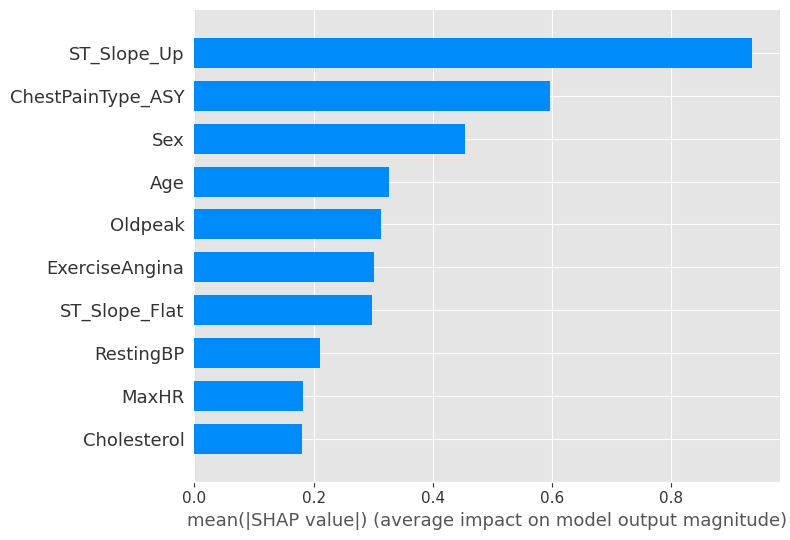

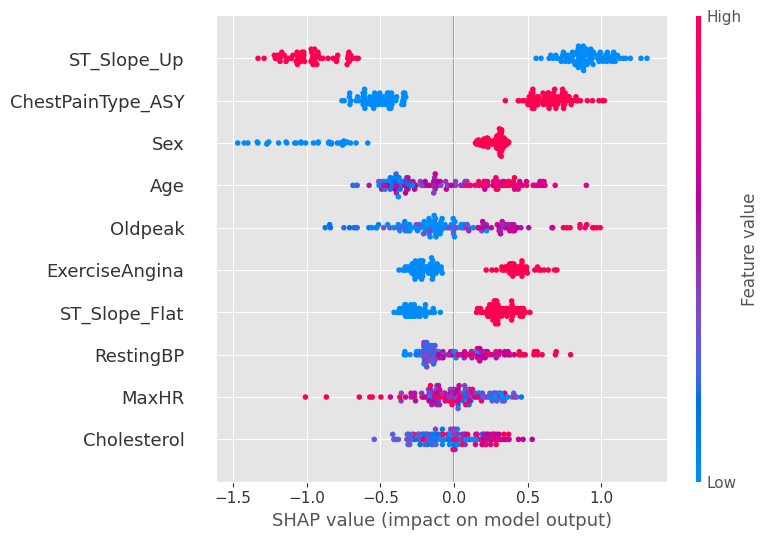

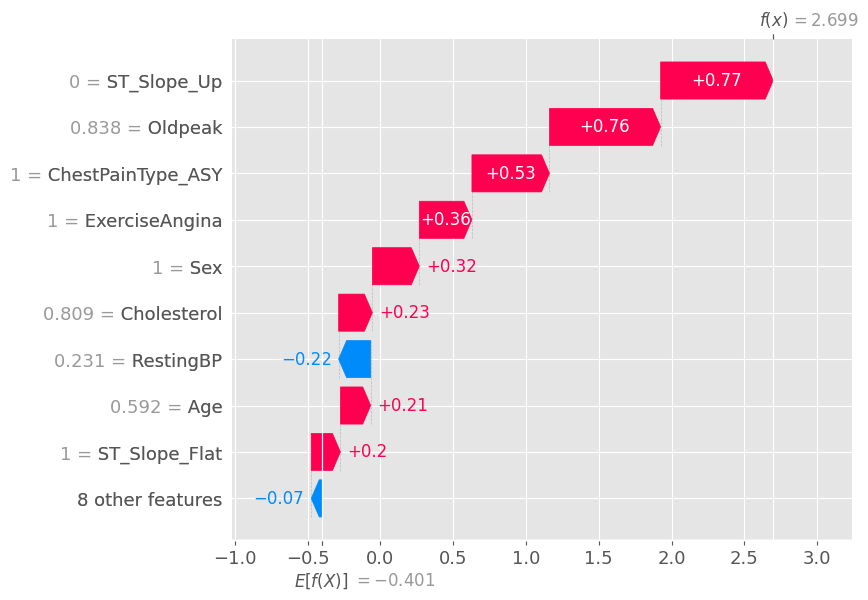

In [41]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt

# === SHAP Explainability ===
# Pastikan X_test adalah DataFrame dan kolomnya sesuai
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Inisialisasi TreeExplainer untuk model gradient boosting
explainer = shap.Explainer(best_gb_model, X_train)

# Hitung SHAP values (nonaktifkan additivity check jika perlu)
shap_values = explainer(X_test_df, check_additivity=False)

# === Summary Plot (Bar) ===
shap.summary_plot(shap_values, X_test_df, plot_type="bar", max_display=10)

# === Summary Plot (Beeswarm) ===
shap.summary_plot(shap_values, X_test_df, max_display=10)

# === Waterfall plot untuk satu sampel (opsional) ===
shap.plots.waterfall(shap_values[0])

**Rekomendasi Strategis:**

* **Kampanye Berbasis Gender**, Fokuskan edukasi pada pria melalui media komunitas pria (olahraga, kerja, ibadah).

* **Edukasi Nyeri Dada Tersembunyi**, Sosialisasikan bahwa gejala penyakit jantung bisa tanpa nyeri dada khas (misal: lelah, sesak napas).

* **Pemeriksaan EKG Rutin**, Sediakan EKG murah/gratis untuk usia >45 tahun dan latih tenaga medis membaca EKG dasar.

* **Pantau Exercise Angina**, Edukasi masyarakat soal nyeri saat olahraga dan integrasikan dalam program kebugaran rutin.

* **Skrining Lansia**, Prioritaskan pemeriksaan jantung untuk usia >50 tahun dan beri insentif partisipasi.

* **Monitoring Tanda Vital**, Ajak masyarakat pantau tekanan darah, detak jantung, dan oldpeak secara berkala.

* **Kolesterol & Risiko Lain**, Tekankan kolesterol sehat penting, tapi tetap waspada jika ada faktor risiko lain meski kolesterol rendah.